# Piecewise Linear Interpolation

In [1]:
using DrWatson;
@quickactivate "MATH361Lectures";
import MATH361Lectures

In [2]:
using Polynomials, Plots, LaTeXStrings
default(markersize=3,linewidth=1.5);

In [3]:
function build_lagrange(x;nodes,f)
    
    y = f.(nodes);
    np1 = length(nodes);
    pn = 0.0;
    
    for k=1:np1
        xt = copy(nodes);
        deleteat!(xt,k)
        num = x .- xt;
        dom = nodes[k] .- xt;
        Q = (num)./(dom);
        L = prod(Q);
        pn += y[k]*L;
    end
    
    return pn
end   

build_lagrange (generic function with 1 method)

In [4]:
function build_pwl(x;nodes,f)
   
    y = 0.0;
    np1 = length(nodes);
    for l = 1:np1-1
        if nodes[l] <= x && x <= nodes[l+1]
            y = build_lagrange(x;nodes = [nodes[l],nodes[l+1]],f=f);
        end
    end
    
    return y
    
end

build_pwl (generic function with 1 method)

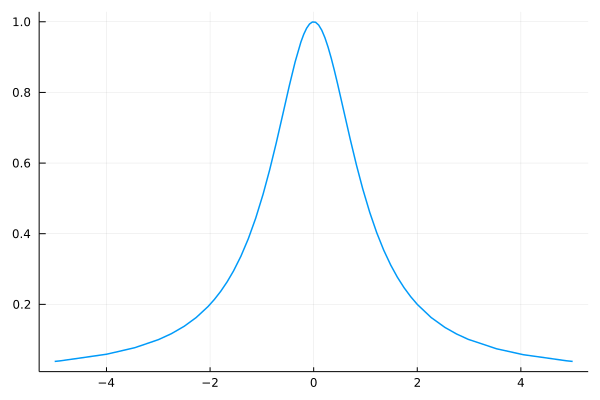

In [5]:
f_runge(x) = 1/(1+x^2);
p = plot(f_runge,-5.0,5.0,legend=false)

In [16]:
n = 25
dx = (5.0 + 5.0)/n
nodes15 = [x for x in -5.0:dx:5.0];
pw_f(x) = build_pwl(x;nodes=nodes15,f=f_runge);

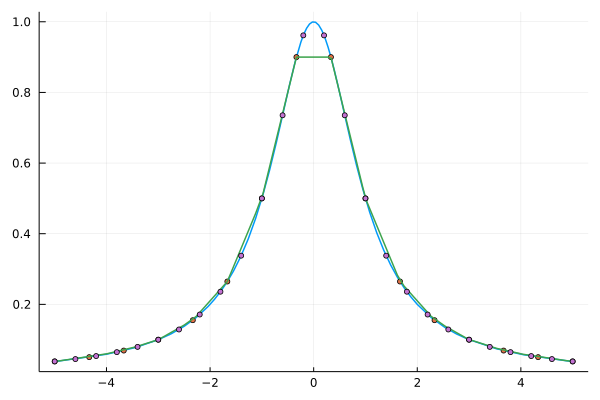

In [17]:
plot!(p,nodes15,f_runge.(nodes15),seriestype = :scatter)

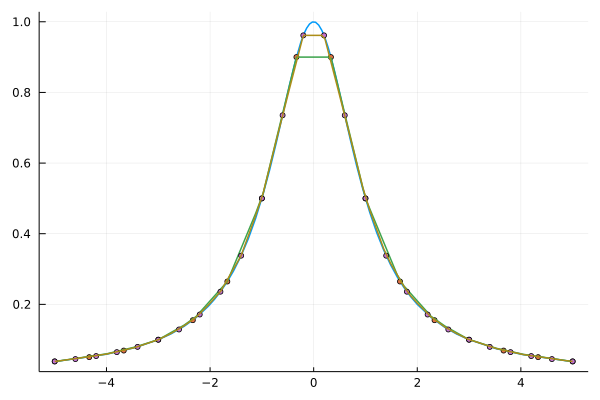

In [18]:
plot!(p,pw_f,-5,5)

## Illustration of Piecewise Linear Interpolation Convergence 

Recall in lecture that we derived the following error estimate for piecewise linear interpolation:

$$\|f-p_{n}\|_{\infty} \leq M h^2,$$

where $h=\frac{b-a}{n}$ is the distance between consecutive nodes, and $M=\|f''\|_{\infty}$. We summarized this by stating that "piecewise linear interpolation is second-order accurate."

We will illustrate the second-order accurate fact with a computational example. The following function inputs a function $f$, an interval $[a,b]$, and a number of nodes to use $n$. The function then constructs the piecewise linear interpolant and copmutes the resulting error $\|f-p_{n}\|_{\infty}$.  

In [9]:
function piecewise_error(n;f,dom=[0.0,1.0])
    a = dom[1];
    b = dom[2];
    h = (b-a)/n;
    nodes = a:h:b;
    pw_f(x) = build_pwl(x;nodes=nodes,f=f);
    dx = (b-a)/1000;
    x = a:dx:b;
    y_f = @. f(x);
    p_y = @. pw_f(x);
    err = maximum(abs.(y_f-p_y))
    return err
end

piecewise_error (generic function with 1 method)

In [10]:
f(x) = exp(sin(7*x));
err_n(n) = piecewise_error(n,f=f);

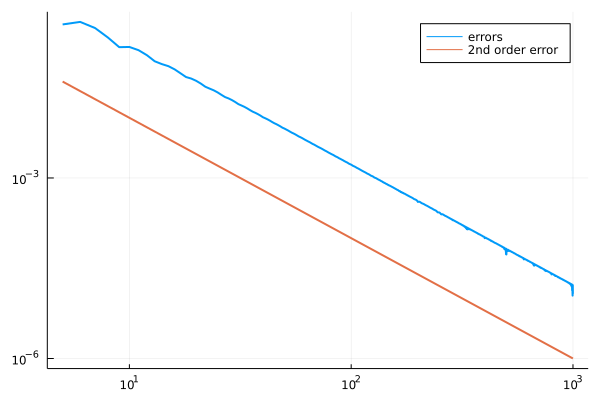

In [15]:
ns = 5:999;
errs = [err_n(n) for n in ns]
plot(ns,[errs,(ns).^(-2.0)],linewidth=2,xaxis=:log, yaxis=:log,labels=["errors" "2nd order error"])